In [1]:
# Import module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Sort by Month (ISPA)

In [2]:
# Add csv file
df_ispa = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/overlay_allvar/allvar_ispa_all.csv')
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  300 non-null    int64  
 1   Unnamed: 0    300 non-null    int64  
 2   KABKOT        300 non-null    object 
 3   month         300 non-null    int64  
 4   year          300 non-null    int64  
 5   longitude     300 non-null    float64
 6   latitude      300 non-null    float64
 7   pm2p5         300 non-null    float64
 8   time          300 non-null    object 
 9   RH            300 non-null    float64
 10  t2m           300 non-null    float64
 11  tp            300 non-null    float64
 12  ispa          300 non-null    int64  
 13  pm10          300 non-null    float64
 14  so2           300 non-null    float64
 15  ispa_balita   300 non-null    int64  
 16  ispa_5y       300 non-null    int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 40.0+ KB


In [3]:
# Drop the columns
df_ispa = df_ispa.drop(['Unnamed: 0', 'RH', 'Unnamed: 0.2', 'Unnamed: 0.1', 'tp', 't2m'], axis=1)

KeyError: "['Unnamed: 0.2'] not found in axis"

In [ ]:
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   KABKOT     300 non-null    object 
 1   month      300 non-null    int64  
 2   year       300 non-null    int64  
 3   longitude  300 non-null    float64
 4   latitude   300 non-null    float64
 5   time       300 non-null    object 
 6   ispa       300 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 16.5+ KB


In [ ]:
# Filter for years 2018-2022
data_ispa = df_ispa[(df_ispa['year'] >= 2018) & (df_ispa['year'] <= 2022)]

# Group sum_ispa by KABKOT, month, and time
ispa_sort = data_ispa.groupby(['KABKOT', 'month', 'time'])['ispa_5y'].sum()
ispa_sort

KABKOT         month  time      
JAKARTA BARAT  1      2018-01-01    35036
                      2019-01-01     1688
                      2020-01-01    30245
                      2021-01-01     8616
                      2022-01-01    19330
                                    ...  
JAKARTA UTARA  12     2018-12-01     9376
                      2019-12-01    31251
                      2020-12-01     6555
                      2021-12-01    11270
                      2022-12-01    25644
Name: ispa, Length: 300, dtype: int64

Sort by Month (t2m)

In [ ]:
# Add csv file
df_t2m = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/overlay_allvar/allvar_ispa_all.csv')
df_t2m = df_t2m.drop(['Unnamed: 0', 'ispa', 'Unnamed: 0.2', 'Unnamed: 0.1', 'tp', 'RH'], axis=1)
df_t2m

,KABKOT,month,year,longitude,latitude,time,t2m
0,JAKARTA BARAT,1,2018,106.750000,-6.158333,2018-01-01,27.059570
1,JAKARTA BARAT,2,2018,106.750000,-6.158333,2018-02-01,26.742241
2,JAKARTA BARAT,3,2018,106.750000,-6.158333,2018-03-01,27.245901
3,JAKARTA BARAT,4,2018,106.750000,-6.158333,2018-04-01,27.659839
4,JAKARTA BARAT,5,2018,106.750000,-6.158333,2018-05-01,28.083251
...,...,...,...,...,...,...,...
295,JAKARTA UTARA,8,2022,106.891667,-6.125000,2022-08-01,27.524175
296,JAKARTA UTARA,9,2022,106.891667,-6.125000,2022-09-01,27.479439
297,JAKARTA UTARA,10,2022,106.891667,-6.125000,2022-10-01,27.231961
298,JAKARTA UTARA,11,2022,106.891667,-6.125000,2022-11-01,27.315895


In [ ]:
# Filter for years 2018-2022
data_t2m = df_t2m[(df_t2m['year'] >= 2018) & (df_t2m['year'] <= 2022)]

# Group mean_RH by KABKOT, month, and time
t2m_sort = data_t2m.groupby(['KABKOT', 'month', 'time'])['t2m'].mean()
t2m_sort

KABKOT         month  time      
JAKARTA BARAT  1      2018-01-01    27.059570
                      2019-01-01    27.294820
                      2020-01-01    27.189461
                      2021-01-01    26.542722
                      2022-01-01    27.176343
                                      ...    
JAKARTA UTARA  12     2018-12-01    27.704404
                      2019-12-01    27.634280
                      2020-12-01    27.019764
                      2021-12-01    27.322513
                      2022-12-01    27.046689
Name: t2m, Length: 300, dtype: float64

Merge ISPA and t2m (sorted)

In [ ]:
merge_ispa_t2m = pd.merge(ispa_sort, t2m_sort, on=['KABKOT','month','time'])
merge_ispa_t2m

ispa        t2m
KABKOT        month time                        
JAKARTA BARAT 1     2018-01-01  35036  27.059570
                    2019-01-01   1688  27.294820
                    2020-01-01  30245  27.189461
                    2021-01-01   8616  26.542722
                    2022-01-01  19330  27.176343
...                               ...        ...
JAKARTA UTARA 12    2018-12-01   9376  27.704404
                    2019-12-01  31251  27.634280
                    2020-12-01   6555  27.019764
                    2021-12-01  11270  27.322513
                    2022-12-01  25644  27.046689

[300 rows x 2 columns]

In [ ]:
overlay = merge_ispa_t2m.groupby(['KABKOT', 'month']).agg({'ispa_5y':'sum', 't2m':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

# rename columns
overlay = overlay.rename(columns={'ispa_5y': 'sum_ispa', 't2m':'mean_t2m'})

In [ ]:
overlay

,KABKOT,month,sum_ispa,mean_t2m
0,JAKARTA BARAT,1,94915,27.052583
1,JAKARTA BARAT,2,61569,26.963170
2,JAKARTA BARAT,3,56608,27.367852
3,JAKARTA BARAT,4,39893,27.675400
4,JAKARTA BARAT,5,31488,27.992774
5,JAKARTA BARAT,6,41114,27.608622
6,JAKARTA BARAT,7,36988,27.560659
7,JAKARTA BARAT,8,39798,27.703627
8,JAKARTA BARAT,9,48285,27.895288
9,JAKARTA BARAT,10,57399,28.090522


Rename month for month_name

In [ ]:
import calendar

# Format for monthly graph
overlay['month'] = pd.to_datetime(overlay['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
overlay= overlay.set_index('month').reset_index()

Plot ISPA x t2m

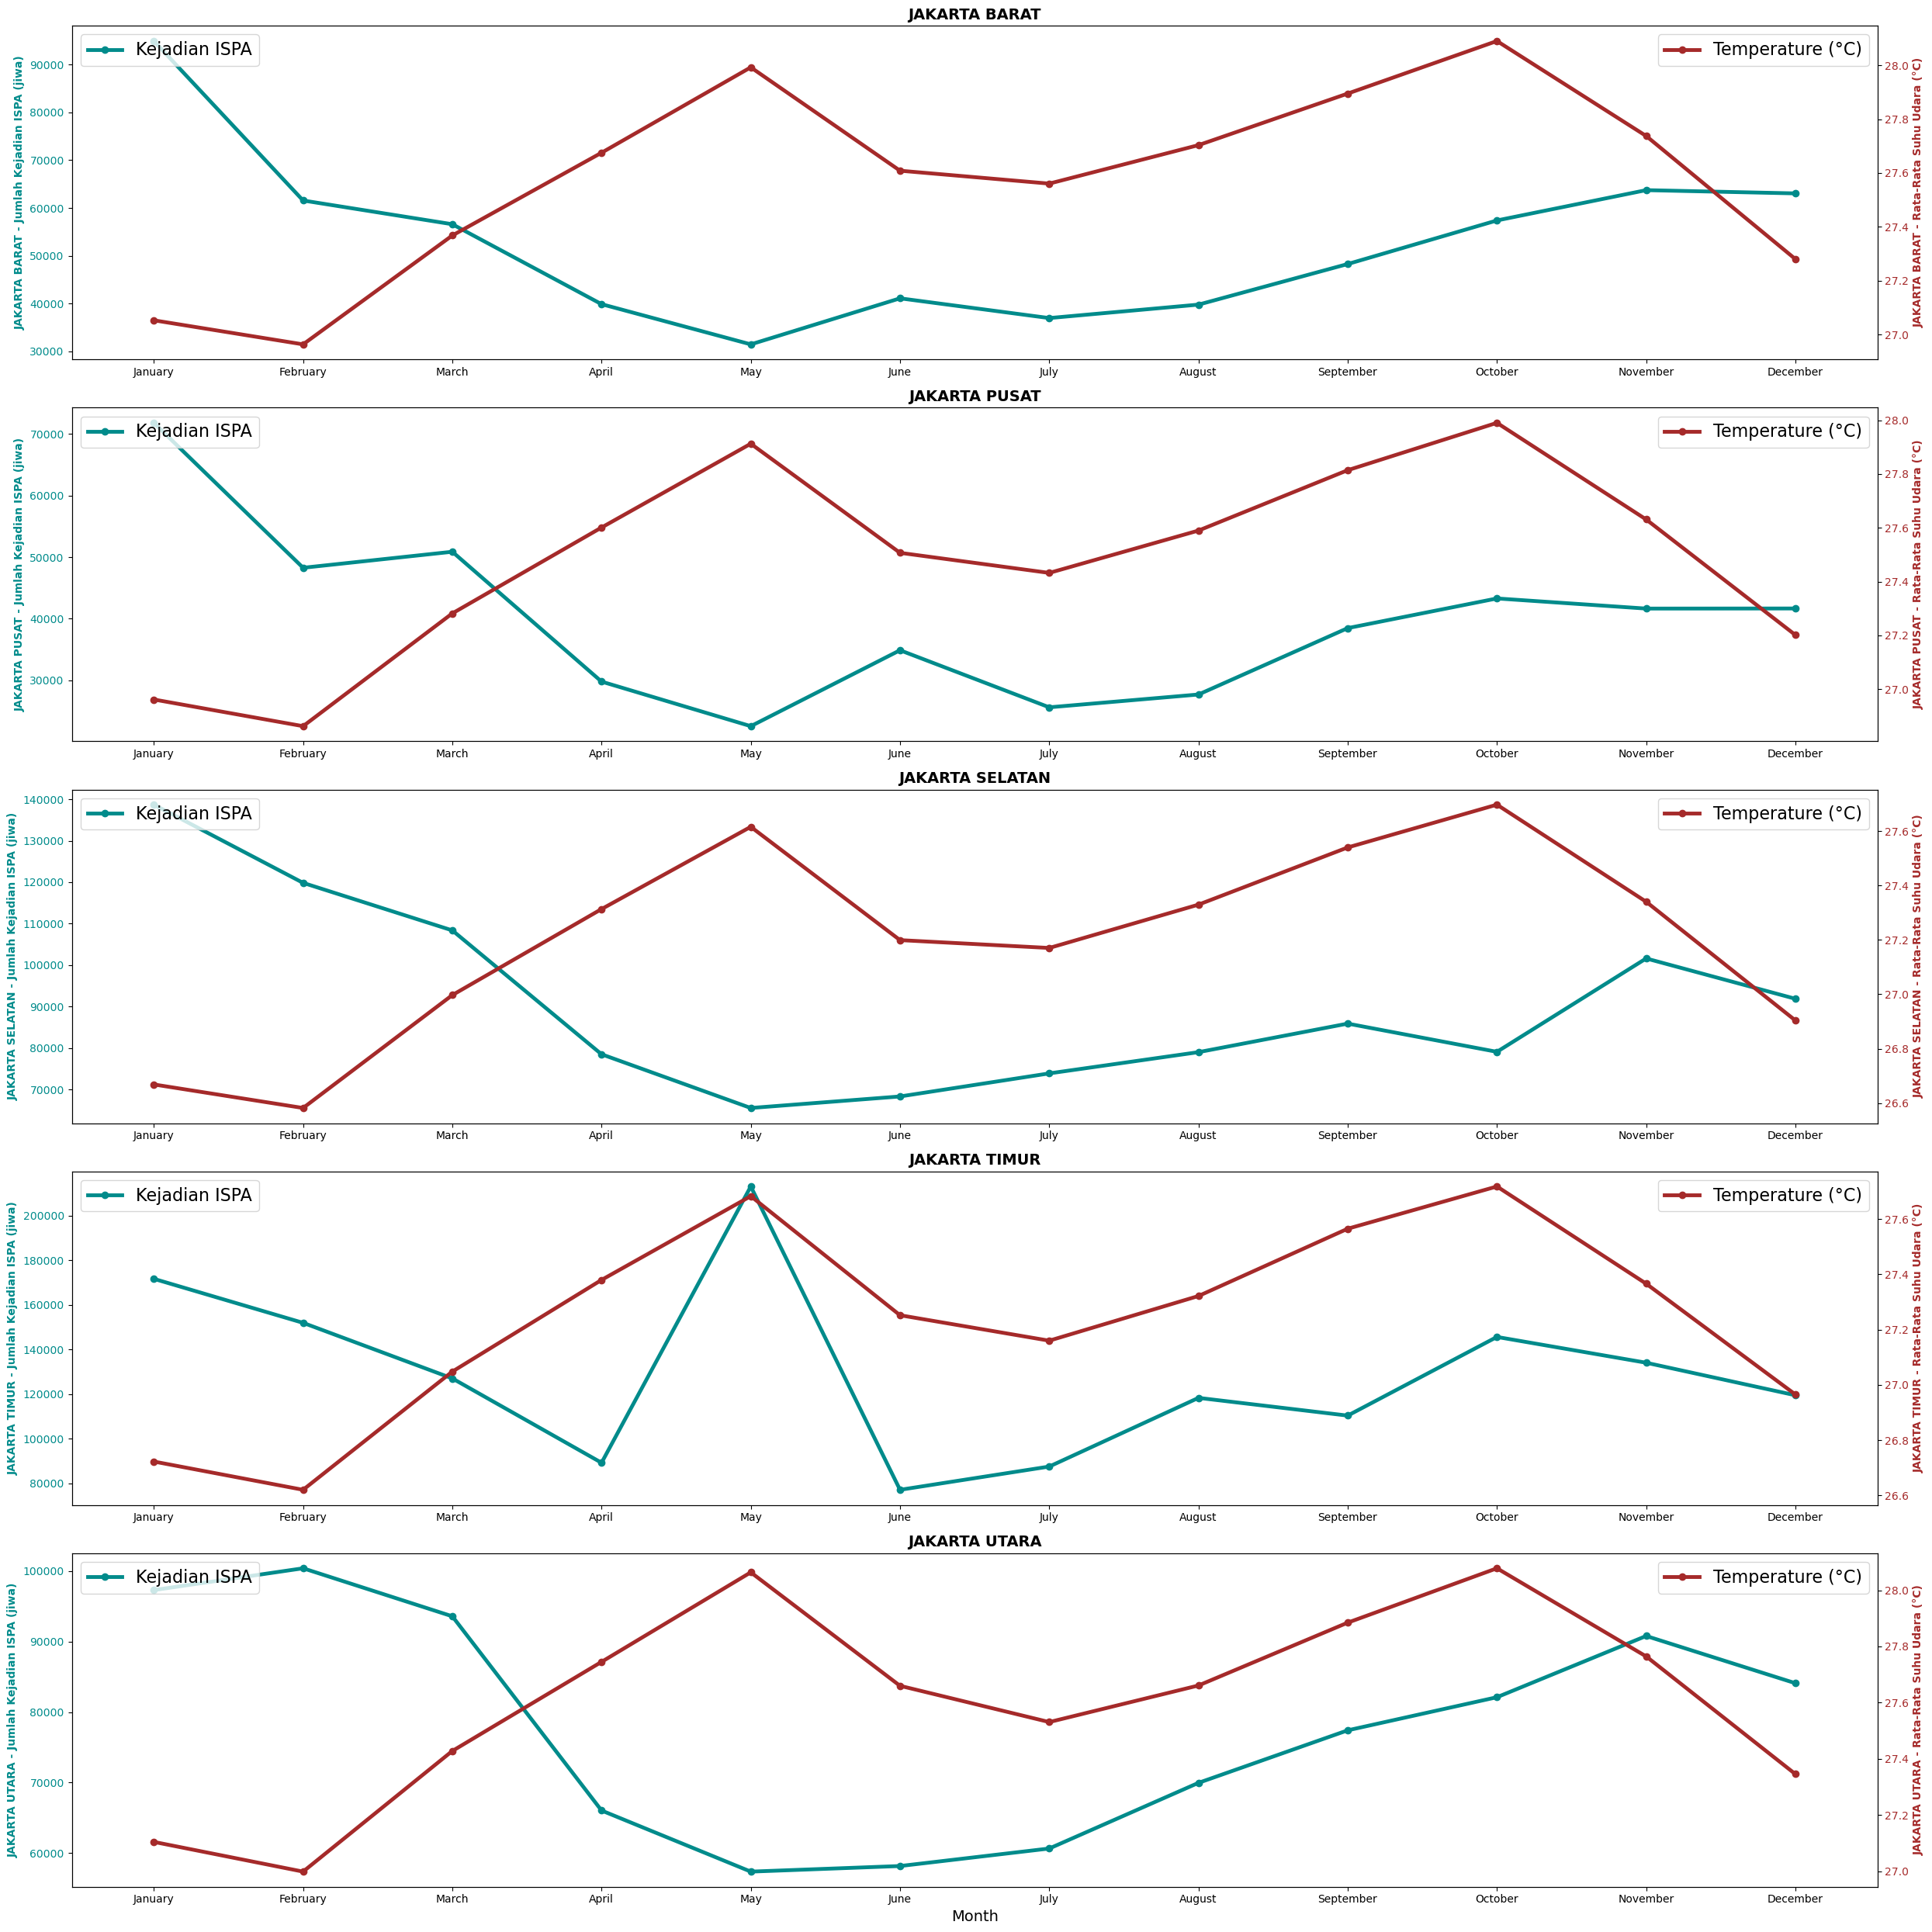

In [ ]:
indicators = ['sum_ispa', 'mean_t2m']

# Group data by KABKOT
grouped_data = overlay.groupby('KABKOT')

# Plot time series for 'tb' and 'pm2p5' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(25, len(grouped_data)*5), sharex=False)


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['sum_ispa']
    y2 = group['mean_t2m']

    ax.plot(x, y1, label='Kejadian ISPA', marker='o', linewidth=3.5, color='darkcyan')
    ax.set_ylabel(f'{name} - Jumlah Kejadian ISPA (jiwa)', color='darkcyan', weight='bold')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='Temperature (°C)', marker='o',linewidth=3.5, color='brown')
    ax2.set_ylabel(f'{name} - Rata-Rata Suhu Udara (°C)', color='brown', weight='bold')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)

# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', weight='bold', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR', weight='bold', fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', weight='bold', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', weight='bold', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', weight='bold', fontsize= 14)

plt.tight_layout()
plt.show()